# Singular value decomposition

Dataset shape: (50, 72)


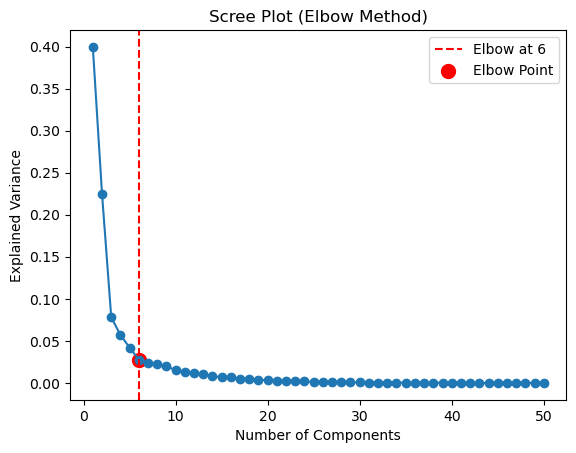

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

data = loadmat('../data/leukemia.mat')
X = data["leukemia"]
print("Dataset shape:", X.shape)

X_scaled = StandardScaler().fit_transform(X)

U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)

explained_variance = S**2 / np.sum(S**2)  # S contains singular values

plt.plot(range(1, len(S) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot (Elbow Method)")

knee_locator = KneeLocator(range(1, len(S) + 1), explained_variance, curve="convex", direction="decreasing")
elbow_point = knee_locator.knee

# highlight elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at {elbow_point}')
plt.scatter(elbow_point, explained_variance[elbow_point - 1], color='red', s=100, label='Elbow Point')
plt.legend()
plt.show()

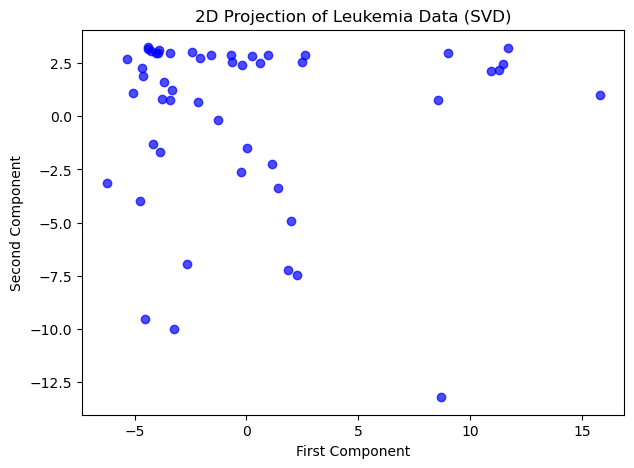

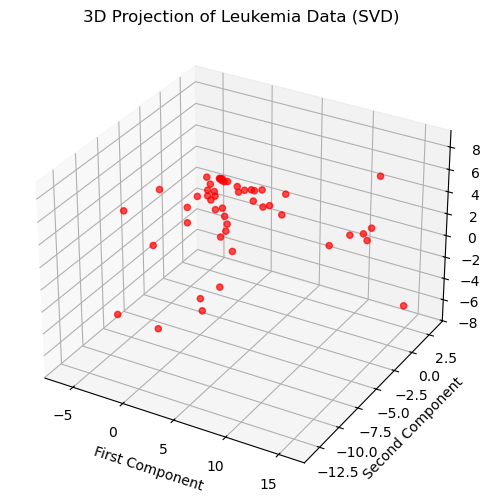

In [83]:
k = 6 # reduce data to k=6
X_reduced_svd = U[:, :k] @ np.diag(S[:k])

# 2D plot
plt.figure(figsize=(7, 5))
plt.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c='b', alpha=0.7)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('2D Projection of Leukemia Data (SVD)')
plt.show()

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], X_reduced_svd[:, 2], c='r', alpha=0.7)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('3D Projection of Leukemia Data (SVD)')
plt.show()

## PCA

c:\Users\yan4etooo\Documents\GitHub\eda-lab-1\.pixi\envs\default\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\yan4etooo\Documents\GitHub\eda-lab-1\.pixi\envs\default\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


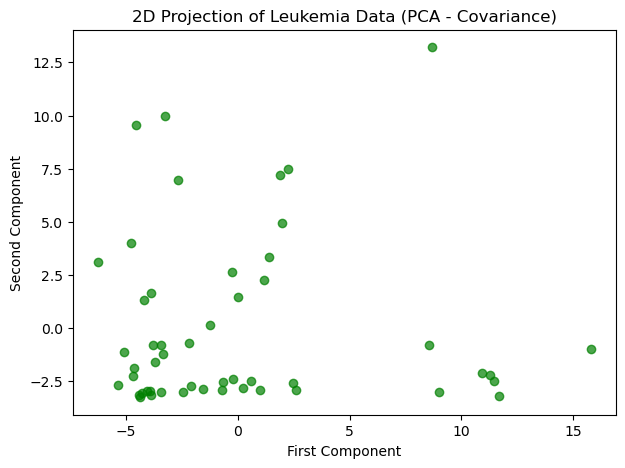

In [84]:
import pyEDAkit as eda_lin

X_reduced_pca_cov = eda_lin.PCA(X_scaled, d=6, covariance=True, plot=False)

# 2D plot
plt.figure(figsize=(7, 5))
plt.scatter(X_reduced_pca_cov[:, 0], X_reduced_pca_cov[:, 1], c='g', alpha=0.7)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('2D Projection of Leukemia Data (PCA - Covariance)')
plt.show()